# 지도학습(분류)
- 데이터 분석 프로세스
  - 데이터 수집 -> 데이터 탐색 및 준비 -> 모델 훈련 -> 모델 성능 평가 -> 모델 성능 개선
- KNN(K최근접이웃)
  - 제일 먼저 K개의 같은 범주로 구분되는 쪽으로 데이터 샘플을 분류하는 방식의 기법
  - 장점
    - 단순하고 효율적, 직관적
    - 분포에 대한 가정이 없음
    - 훈련이 빠름
  - 단점
    - 적절한 K를 선택 필요
- SVM(서포트벡터머신)
  - 초평면(하이퍼플래인) 기반으로 데이터를 분류하는 방식의 기법
    - 최대 마진 초평면(MMH, Maximum Margin Hyperplane)
  - 커널 함수(보통 RBF 함수)를 이용
  - 장점
    - 분류, 회귀 모두 적용 가능
    - 노이즈, 과적합에 영향이 거의 없음
  - 단점
    - 적절한 파라미터 조합 테스트 필요(커널 함수 등)
- DT(결정트리)
  - 트리 방식으로 데이터셋의 순수도를 최대화하는 방향으로 트리를 성장시키면서 분류하는 방식의 기법
    - C5.0, CART 알고리즘 등이 사용
  - 장점
    - 분류, 회귀 모두 적용 가능
    - 직관적으로 모델을 이해할 수 있음
  - 단점
    - 모델이 과적합, 과소적합되기 쉬움
- 배깅(bootstrap aggregation)
- 부스팅
- 랜덤포레스트
  - 장점
    - 모든 문제에 대해 잘 수행되는 기법
    - 노이즈 데이터나 누락 데이터를 다룰수 있음
  - 단점
    - 모델 해석이 쉽지 않음
- 나이브베이즈
- 로지스틱회귀



In [ ]:
import pandas as pd
from datetime import datetime
from sklearn import metrics, model_selection

df = pd.read_csv('./data/weatherAUS.csv')

# 행과 열 개수 확인
# 142193개 관측치, 21개 변수
print(f'데이터 요약 확인\n shape={df.shape}\n columns={df.columns}')
print(f"컬럼별 NA 개수 확인\n{df.isnull().sum()}")

# 행에 NA가 하나만 있어도 삭제
df2 = df.dropna()

print(f"컬럼별 NA 개수 확인\n{df2.isnull().sum()} shape={df2.shape}\n columns={df2.columns}")

# NA값이 10000개 이상인 열을 제외
# df3 = df.dropna(
#     axis = 'columns' # 열을 제외
#     , thresh =  142193 - 9999   # N개 이상의 non-NA값을 갖고 있는 것만 남김
#                                 # 즉, NA가 아닌 값이 (142193 - 9999) 개수만큼 되는 것만 남기는 것
# )

print(f"na 데이터 전부 드랍 후 확인\n{df2.isnull().sum()}")

# Date 변수를 Date형으로 변환(python datetime을 이용)
# df3['Date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))

# 데이터 샘플 체크
print(df2.head())

# 단순히 문자형 데이터는 삭제하고, 나머지를 이용할 것

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    df2[['MinTemp', 'MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm', 'Temp3pm']]
    , df2['RainTomorrow']
    , train_size = 0.7
    , test_size = 0.3
    , random_state = 0
)

# print(f"x_train={x_train.shape}, x_test={x_test.shape}, y_train={y_train.shape}, y_test={y_test.shape}")

#---------------------------------------------------------------------------------------
# Q2) train 데이터로 종속변수인 RainTomorrow(다음날의 강수 여부)를 예측하는 분류모델을 
#     3개 이상 생성하고 test 데이터에 대한 예측값을 csv파일로 각각 제출하시오.
#---------------------------------------------------------------------------------------
# K-NN, SVM, DT, 나이브베이즈, 로지스틱 회귀, ANN, 랜덤포레스트, 배깅, 부스팅

from sklearn.neighbors import KNeighborsClassifier

# KNN
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)

print(f"train set accurate = {model.score(x_train, y_train):0.3f}")
print(f"test set accurate = {model.score(x_test, y_test):0.3f}")

# SVM
from sklearn.svm import SVC

model = SVC(kernel = 'rbf', C = 10, gamma = 0.1)
model.fit(x_train, y_train)

print(f"train set accurate = {model.score(x_train, y_train):0.3f}")
print(f"test set accurate = {model.score(x_test, y_test):0.3f}")

# DT
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

tree.plot_tree(decision_tree = model)

print(f"train set accurate = {model.score(x_train, y_train):0.3f}")
print(f"test set accurate = {model.score(x_test, y_test):0.3f}")

# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)

print(f"train set accurate = {model.score(x_train, y_train):0.3f}")
print(f"test set accurate = {model.score(x_test, y_test):0.3f}")





데이터 요약 확인
 shape=(142193, 21)
 columns=Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')
컬럼별 NA 개수 확인
Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64
컬럼별 NA 개수 확인
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindG

In [2]:
###################################################################################
#                      2. 정형 데이터마이닝 (사용 데이터 : Titanic)                  
###################################################################################

#---------------------------------------------------------------------------------------
# Q1) cabib, embarked변수의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 
#     문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오.
#     또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고
#     age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오. 
#---------------------------------------------------------------------------------------

import pandas as pd
import numpy as np

# 데이터 수집 => 데이터 전처리 => 모델 훈련 => 모델 성능 평가 => 모델 성능 개선
df = pd.read_csv('./data/titanic.csv')
print(f"shape={df.shape}")
print(df.head())

# 필드별 NA 개수 확인
print(df.isnull().sum())

# pclass         0
# survived       0
# name           0
# sex            0
# age          263
# sibsp          0
# parch          0
# ticket         0
# fare           1
# cabin       1014
# embarked       2
# dtype: int64

# cabib, embarked변수의 값 중 ""로 처리된 값을 NA로 바꾸고
# cabin값이 비어있는것은 NA로 변환
#df[df['cabin'].isnull()] # 이미 NA로 변환되어 있음
#df[df['embarked'].isnull()] # 이미 NA로 변환되어 있음

# 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체
# cabin, embarked의 na값은 중앙값으로 대체(범주형 타입)
df['cabin'] = df['cabin'].fillna(df['cabin'].mode()[0]) # 0번째 원소를 꺼내는 것까지 명시해야함에 주의(최빈값은 여러개 나올수 있으므로 배열로 반환됨)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# face는 중앙값으로 대체
df['fare'] = df['fare'].fillna(df['fare'].median())
df['age'] = df['age'].fillna(df['age'].median())

print(df.isnull().sum())
print(df.columns)

def getAgeCode(age):
    if age >= 0 and age < 10:
        return 0
    elif age >= 10 and age < 20:
        return 1
    elif age >= 20 and age < 30:
        return 2
    elif age >= 30 and age < 40:
        return 3
    elif age >= 40 and age < 50:
        return 4
    elif age >= 50 and age < 60:
        return 5
    elif age >= 60 and age < 70:
        return 6
    elif age >= 70 and age < 80:
        return 7
    elif age >= 80 and age < 90:
        return 8

df['age_1'] = df['age'].apply(lambda x : getAgeCode(x))
df['sex_1'] = df['sex'].apply(lambda x : 1 if (x == 'male') else 0)
df['embarked_1'] = df['embarked'].apply(lambda x : 1 if (x == 'S') else (2 if (x == 'C') else 0))

print(df.head())

print(f"shape={df.shape}")
print(df['embarked'].value_counts()) # 범주별 카운트


shape=(1309, 11)
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked  
0  29.00      0      0   24160  211.3375       B5        S  
1   0.92      1      2  113781  151.5500  C22 C26        S  
2   2.00      1      2  113781  151.5500  C22 C26        S  
3  30.00      1      2  113781  151.5500  C22 C26        S  
4  25.00      1      2  113781  151.5500  C22 C26        S  
pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0


n_neighbors=[3]
KNN model score on train sets=0.834
KNN model score on test sets=0.758


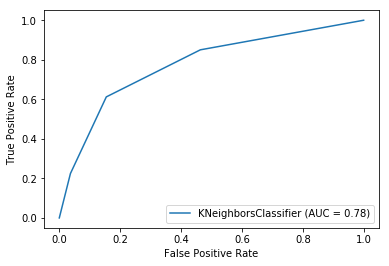

n_neighbors=[4]
KNN model score on train sets=0.817
KNN model score on test sets=0.746


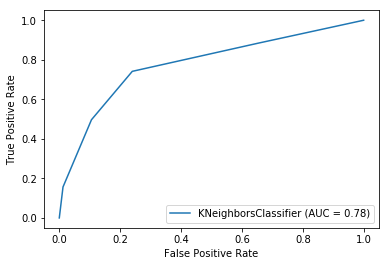

LogisticRegression model score on train sets=0.793
LogisticRegression model score on test sets=0.784


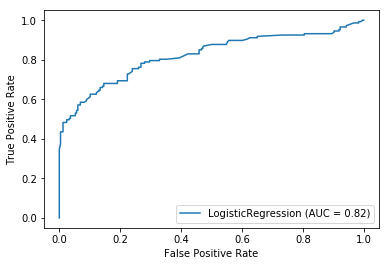

SVM model score on train sets=0.776
SVM model score on test sets=0.781


d:\srkwon\0.repo\analysis\data-analysis-2021\venv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


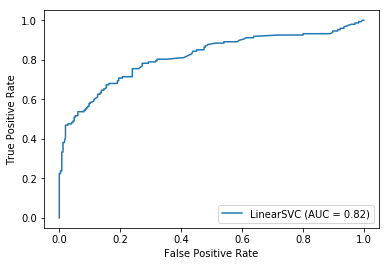

xgb model score on train sets=0.842
xgb model score on test sets=0.776


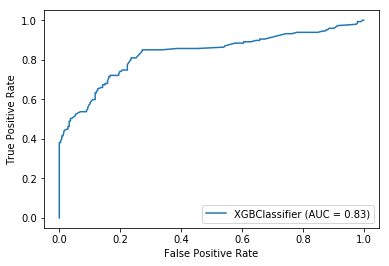

정확도(accuracy) = 0.776


In [4]:
#---------------------------------------------------------------------------------------
# Q2) 전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오.
#    (set.seed(12345)를 실행한 후 데이터를 분할하시오.) 
#    또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, 
#    fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 
#    예측값을 csv파일로 각각 제출하시오.
#---------------------------------------------------------------------------------------

#---------------------------------------------------------------------------------------
# Q3) 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 
#     또, ROC curve를 그리고 AUC값을 산출하시오.
#---------------------------------------------------------------------------------------

import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import plot_roc_curve, accuracy_score # ROC곡선, AUC 확인, 정확도

from sklearn.neighbors import KNeighborsClassifier # KNN

# 선형 모델
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀
from sklearn.svm import LinearSVC # SVM

# xgboost
from xgboost import XGBClassifier

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    df[['pclass', 'sex_1', 'sibsp', 'parch', 'fare', 'embarked_1']]
    , df['survived']
    , train_size = 0.7
    , test_size = 0.3
    , random_state = 0
)

# KNN
# range(a, b) => a 포함, b 제외 사이 정수 반환
for i in range(3,5):
    print(f"n_neighbors=[{i}]")
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    print(f"KNN model score on train sets={model.score(x_train, y_train):5.3f}")
    print(f"KNN model score on test sets={model.score(x_test, y_test):5.3f}")
    
    plot_roc_curve(model, x_test, y_test)
    plt.show()


# 로지스틱 회귀
model = LogisticRegression(max_iter = 5000)
model.fit(x_train, y_train)
print(f"LogisticRegression model score on train sets={model.score(x_train, y_train):5.3f}")
print(f"LogisticRegression model score on test sets={model.score(x_test, y_test):5.3f}")

plot_roc_curve(model, x_test, y_test)
plt.show()

# SVM
model = LinearSVC(max_iter = 5000)
model.fit(x_train, y_train)
print(f"SVM model score on train sets={model.score(x_train, y_train):5.3f}")
print(f"SVM model score on test sets={model.score(x_test, y_test):5.3f}")

plot_roc_curve(model, x_test, y_test)
plt.show()

# xgboost

model = XGBClassifier()
model.fit(x_train, y_train)

print(f"xgb model score on train sets={model.score(x_train, y_train):5.3f}")
print(f"xgb model score on test sets={model.score(x_test, y_test):5.3f}")

plot_roc_curve(model, x_test, y_test)
plt.show()

y_pred = model.predict(x_test)

print(f"정확도(accuracy) = {accuracy_score(y_test, y_pred):5.3f}")

